In [1]:
from simulator import *
from reinforce import *
from qlearning import *

# Q-učenje

## Kreiranje model

In [2]:
agent = Qlearner()

## Obučavanje agenta

In [3]:
agent.learn()

## Prosečna nagrada po epizodi

In [4]:
agent.repeat_epochs(10)

Prosecna ukupna nagrada koju agent ostvaruje tokom jedne epizode je 3.0.


## Optimalna politika i prikaz Q(s,a) i V(s) po iteracijama

U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down


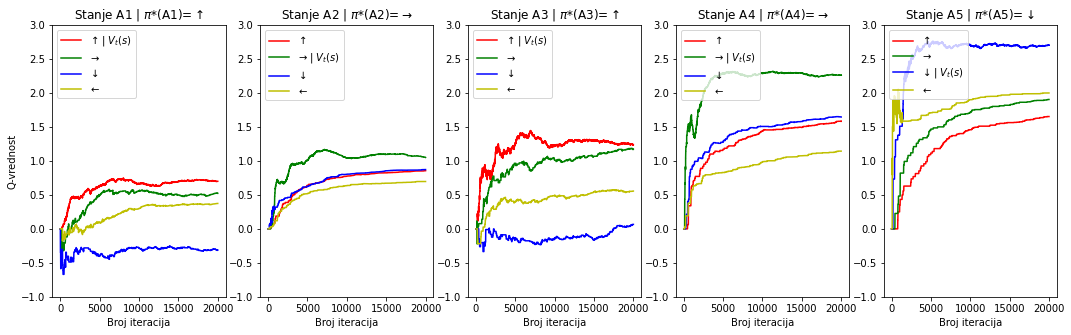

In [5]:
agent.optimal_policy()
agent.visualize()  

## Eksperiment sa $\gamma$ = 0.999

U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije down
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije left


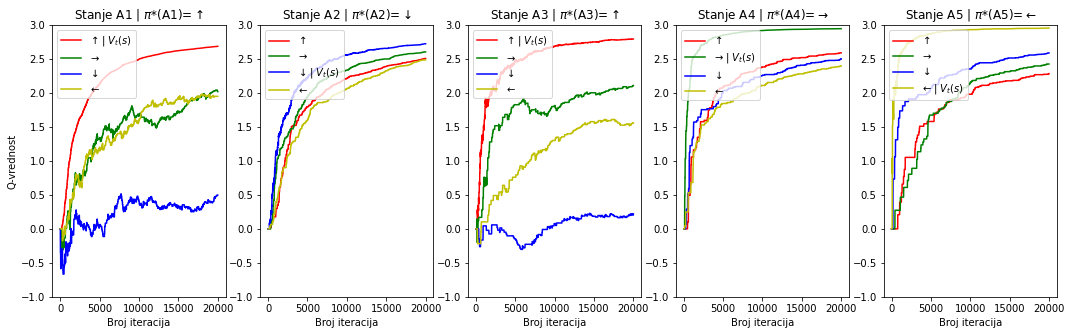

In [6]:
del agent
agent = Qlearner(gamma=0.999)
agent.learn()
agent.optimal_policy()
agent.visualize()  

## Eksperiment sa fiksiranom stopom obučavanja $\alpha$=0.1

U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down


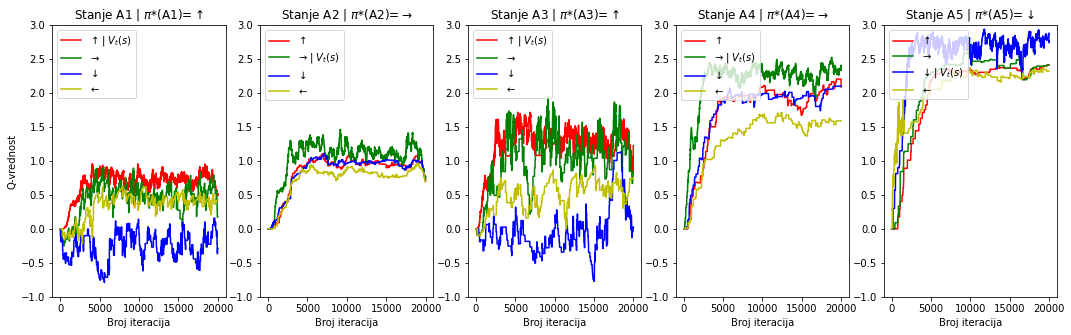

In [7]:
del agent
agent = Qlearner(lr=0.1)
agent.learn()
agent.optimal_policy()
agent.visualize()  

## Eksperiment sa fiksiranom stopom obučavanja $\alpha$=0.01

U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije left


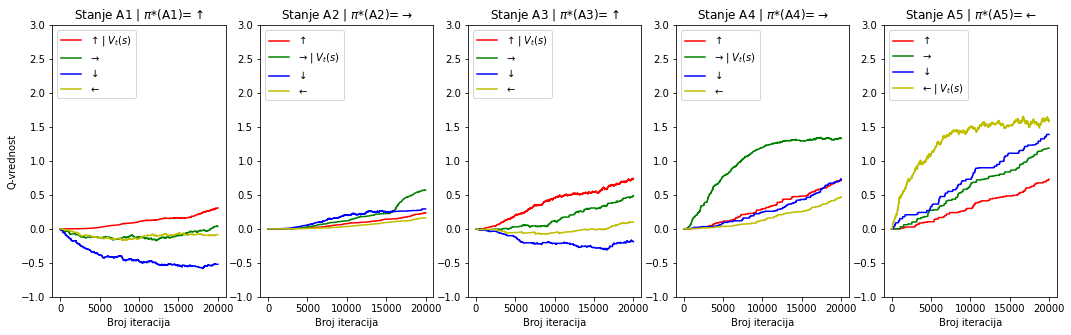

In [8]:
del agent
agent = Qlearner(lr=0.01)
agent.learn()
agent.optimal_policy()
agent.visualize()  

## Eksperiment sa fiksiranom stopom obučavanja $\alpha$=0.05

U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down


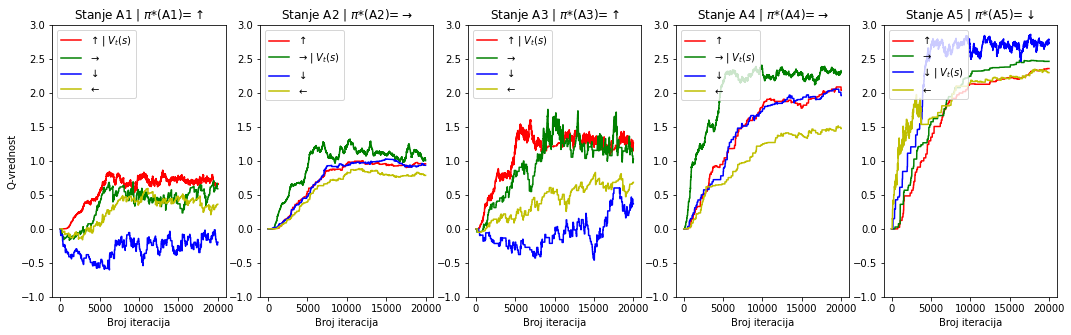

In [9]:
del agent
agent = Qlearner(lr=0.05)
agent.learn()
agent.optimal_policy()
agent.visualize()  

# REINFORCE algoritam

## Obučavanje agenta

In [4]:
del agent
# Kreiranje modela
agent = Reinforce()

# List parametara i prosecnih ukupnih nagrada
theta_lst, reward_lst = [],[]

def learn():
    """Simulacija epohe i ažuriranje parametara"""
    global agent
    agent.run_epoch()
    agent.update()

# Obučavanje do konvergencije
stop = False
while not stop:
    # Prolazak kroz 10 epoha
    [learn() for i in range(10)]
    
    # Ispis optimalne politike
    agent.optimal_policy()
    
    # Cuvanje vrednosti
    reward, params = agent.evaluate()
    reward_lst.append(reward)
    theta_lst.append(params)
    
    # Provera rezultata
    arg = input("Zavrsi obučavanje? [da/ne]")
    arg = arg.strip('\n').strip(' ').lower()
    if ('d' in arg) or ('a' in arg):
        break

KeyboardInterrupt: 

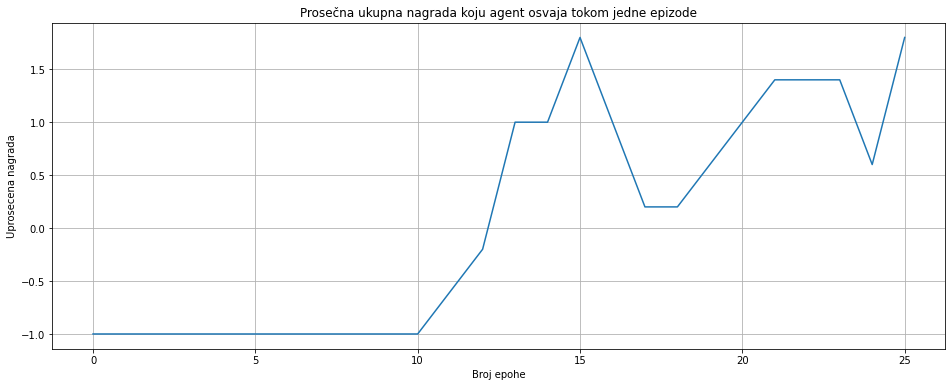

In [9]:
fig, axes = plt.subplots(nrows=1,figsize=(16,6))
axes.plot(reward_lst)
axes.set_title('Prosečna ukupna nagrada koju agent osvaja tokom jedne epizode')
plt.ylabel('Uprosecena nagrada')
plt.xlabel('Broj epohe')
plt.grid()
plt.show()

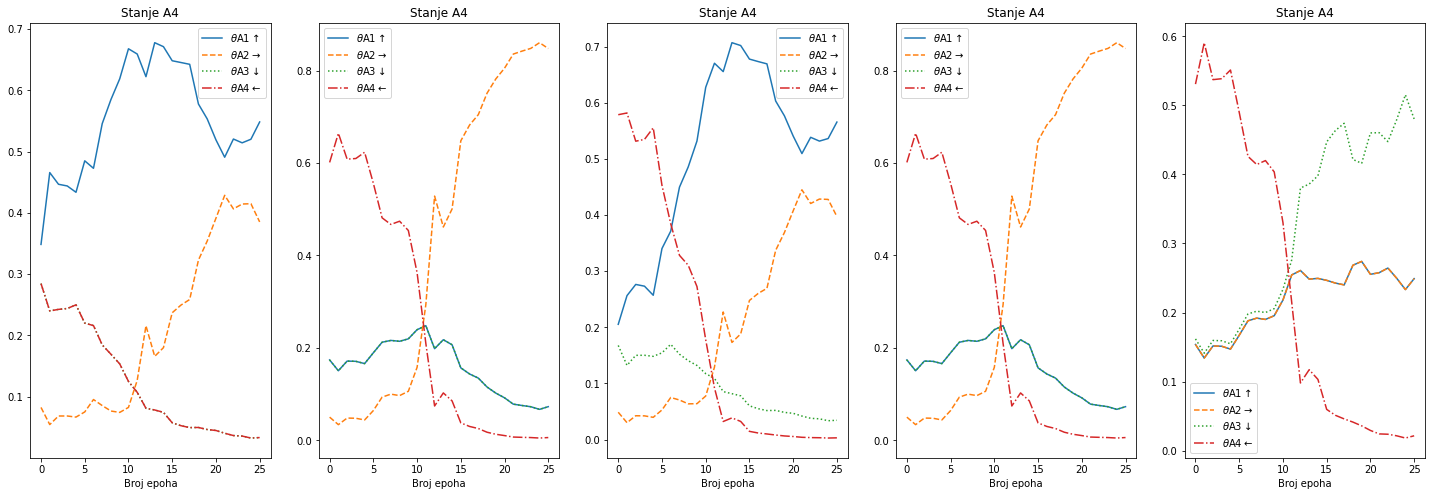

In [24]:
# Konverzija u niz
theta_arr = np.array(theta_lst)

fig, axes = plt.subplots(ncols=5, figsize=(25,8))
ax = axes.ravel()
l = ['-','--',':','-.']
for i in range(5):
    for a in range(4):
        ax[i].plot(theta_arr[:,i,a],linestyle=l[a], label= "$\\theta$A" + str(a+1) + f"${policy2arrows[action_dec[a]]}$")
        ax[i].set_title(f'Stanje A{a+1}')
        ax[i].legend()
        ax[i].set_xlabel('Broj epoha')